# World Happiness Data Analysis and Prediction
Data: Kaggle - https://www.kaggle.com/unsdsn/world-happiness

### Description: 
This was my very first data science project for a data scince class I took in 2018. My goal was to examine what factors contribute to a society's happiness, how those factors relate, and which are the most important in predicting happiness.
______________________________________________________________________________________________________________________

Import libraries:

In [6]:
import pandas as pd
import seaborn as sns; sns.set()
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Import data for 2015-2017:

In [13]:
df1 = pd.read_csv('2015.csv')
df1 = df1.drop(columns={'Standard Error'})
df1 = df1.rename(columns={'Economy (GDP per Capita)':'Economy', 'Trust (Government Corruption)':'Government Trust','Health (Life Expectancy)':'Life Span'})
df1.head(10)

,Country,Region,Happiness Rank,Happiness Score,Economy,Family,Life Span,Freedom,Government Trust,Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
5,Finland,Western Europe,6,7.406,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
6,Netherlands,Western Europe,7,7.378,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
7,Sweden,Western Europe,8,7.364,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
8,New Zealand,Australia and New Zealand,9,7.286,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,Australia and New Zealand,10,7.284,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


In [10]:
df2 = pd.read_csv('2016.csv')
df2 = df2.drop(columns={'Lower Confidence Interval','Upper Confidence Interval'})
df2 = df2.rename(columns={'Economy (GDP per Capita)':'Economy', 'Trust (Government Corruption)':'Government Trust','Health (Life Expectancy)':'Life Span'})
df2.head(10)

,Country,Region,Happiness Rank,Happiness Score,Economy,Family,Life Span,Freedom,Government Trust,Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596
5,Canada,North America,6,7.404,1.44015,1.09610,0.82760,0.57370,0.31329,0.44834,2.70485
6,Netherlands,Western Europe,7,7.339,1.46468,1.02912,0.81231,0.55211,0.29927,0.47416,2.70749
7,New Zealand,Australia and New Zealand,8,7.334,1.36066,1.17278,0.83096,0.58147,0.41904,0.49401,2.47553
8,Australia,Australia and New Zealand,9,7.313,1.44443,1.10476,0.85120,0.56837,0.32331,0.47407,2.54650
9,Sweden,Western Europe,10,7.291,1.45181,1.08764,0.83121,0.58218,0.40867,0.38254,2.54734


In [17]:
#Missing Region
df3 = pd.read_csv('2017.csv')
df3 = df3.drop(columns={'Whisker.high','Whisker.low'})
df3 = df3.rename(columns={'Happiness.Rank':'Happiness Rank','Happiness.Score':'Happiness Score','Economy..GDP.per.Capita.':'Economy', 'Trust..Government.Corruption.':'Government Trust','Health..Life.Expectancy.':'Life Span'})
df3.head(10)

,Country,Happiness Rank,Happiness Score,Economy,Family,Life Span,Freedom,Generosity,Government Trust,Dystopia.Residual
0,Norway,1,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182
5,Netherlands,6,7.377,1.503945,1.428939,0.810696,0.585384,0.470490,0.282662,2.294804
6,Canada,7,7.316,1.479204,1.481349,0.834558,0.611101,0.435540,0.287372,2.187264
7,New Zealand,8,7.314,1.405706,1.548195,0.816760,0.614062,0.500005,0.382817,2.046456
8,Sweden,9,7.284,1.494387,1.478162,0.830875,0.612924,0.385399,0.384399,2.097538
9,Australia,10,7.284,1.484415,1.510042,0.843887,0.601607,0.477699,0.301184,2.065211


Because I am interested in using Region for this analysis, I won't include the 2017 data in my working data frame.

Merge 2015 and 2016 data:

In [20]:
frames = [df1, df2]
df_clean = pd.concat(frames)
df_clean.head()

,Country,Region,Happiness Rank,Happiness Score,Economy,Family,Life Span,Freedom,Government Trust,Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [25]:
df_clean.isnull().values.any()

False

In [21]:
df_clean.shape

(315, 11)

In [26]:
df_clean.dtypes

Country               object
Region                object
Happiness Rank         int64
Happiness Score      float64
Economy              float64
Family               float64
Life Span            float64
Freedom              float64
Government Trust     float64
Generosity           float64
Dystopia Residual    float64
dtype: object

Summary of numerical variables:

In [22]:
df_clean.describe()

,Happiness Rank,Happiness Score,Economy,Family,Life Span,Freedom,Government Trust,Generosity,Dystopia Residual
count,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000
mean,79.238095,5.378949,0.899837,0.892647,0.594054,0.399896,0.140532,0.239957,2.212032
std,45.538922,1.141531,0.410780,0.286718,0.240790,0.150684,0.115490,0.130077,0.558728
min,1.000000,2.839000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.000000,4.510000,0.594900,0.739880,0.419645,0.295890,0.061315,0.151430,1.884135
50%,79.000000,5.286000,0.973060,0.937930,0.640450,0.413190,0.106130,0.218540,2.211260
75%,118.500000,6.269000,1.229000,1.087360,0.787640,0.516730,0.178610,0.311450,2.563470
max,158.000000,7.587000,1.824270,1.402230,1.025250,0.669730,0.551910,0.819710,3.837720


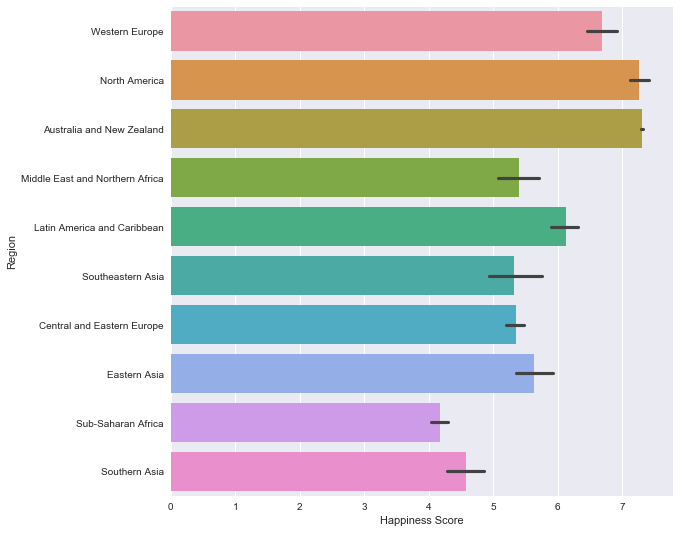

In [27]:
f,ax=plt.subplots(figsize=(9,9))
sns.barplot(x="Happiness Score",y="Region",data=df_clean[['Happiness Score', 'Region']])

In [51]:
df_num = df_clean[['Country', 'Happiness Score','Economy','Family','Life Span', 'Freedom', 'Generosity','Government Trust','Dystopia Residual']]
corr = df_num.corr()
corr

,Happiness Score,Economy,Family,Life Span,Freedom,Generosity,Government Trust,Dystopia Residual
Happiness Score,1.000000,0.779171,0.693547,0.734491,0.556414,0.168272,0.397989,0.526343
Economy,0.779171,1.000000,0.566283,0.789103,0.331127,-0.015402,0.294856,0.079411
Family,0.693547,0.566283,1.000000,0.569937,0.476671,0.075987,0.205060,0.053264
Life Span,0.734491,0.789103,0.569937,1.000000,0.369799,0.088002,0.249773,0.025248
Freedom,0.556414,0.331127,0.476671,0.369799,1.000000,0.356615,0.492875,0.034829
Generosity,0.168272,-0.015402,0.075987,0.088002,0.356615,1.000000,0.289499,-0.110632
Government Trust,0.397989,0.294856,0.205060,0.249773,0.492875,0.289499,1.000000,-0.023504
Dystopia Residual,0.526343,0.079411,0.053264,0.025248,0.034829,-0.110632,-0.023504,1.000000


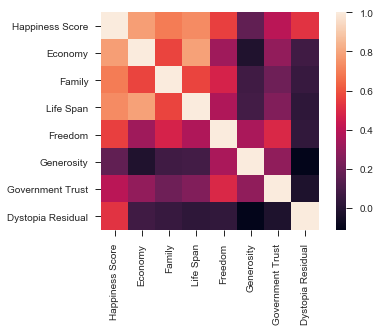

In [49]:
sns.heatmap(corr, square=True)

Lightest colors show positive correlations and darkest colors show negative correlations. My goal is to look at how these variables are related and use them to predict the happiness score.

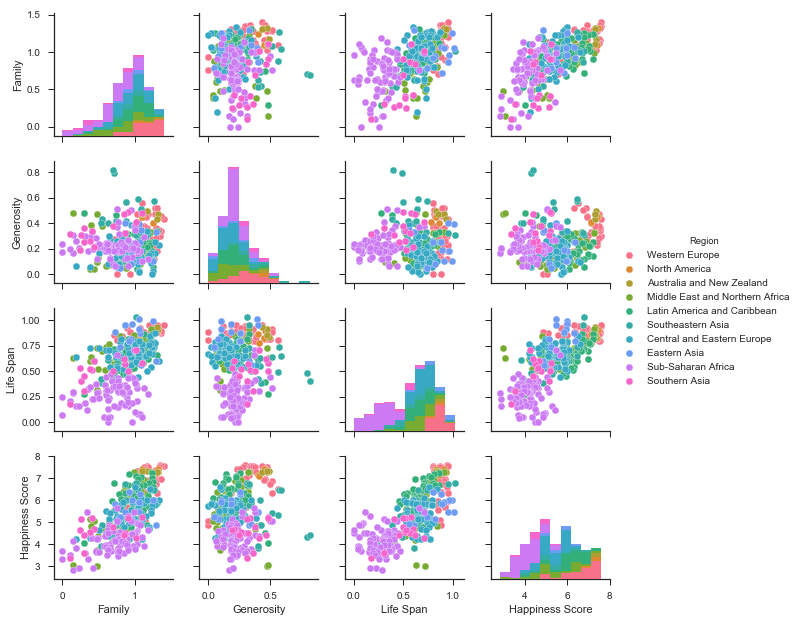

In [29]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(df_clean[['Region', 'Family', 'Generosity', 'Life Span','Happiness Score']], hue="Region", size =2.2)

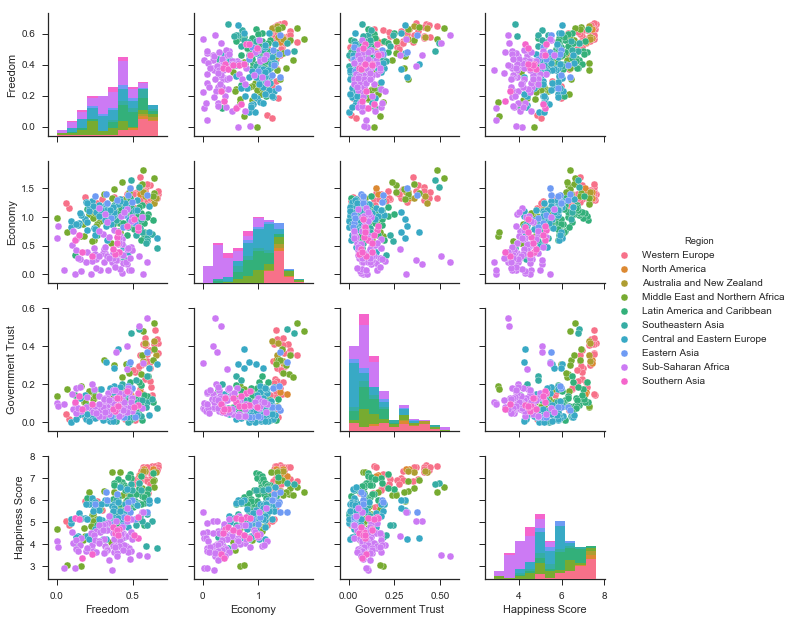

In [30]:
sns.pairplot(df_clean[['Region', 'Freedom', 'Economy', 'Government Trust', 'Happiness Score']], hue="Region", size = 2.2)

### Predicting Happinesss Score:

In [32]:
X = df_clean[['Freedom', 'Family', 'Generosity', 'Life Span', 'Economy', 'Government Trust', 'Dystopia Residual']]
y = df_clean['Happiness Score']

In [33]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(252, 7)
(252,)
(63, 7)
(63,)


### K Neighbors Regression

In [34]:
from sklearn.neighbors import KNeighborsRegressor
neighbors = KNeighborsRegressor(n_neighbors=2)
neighbors = neighbors.fit(x_train, y_train)
print(neighbors.predict(x_test))

[5.7085 5.7035 3.789  5.853  7.1585 6.6775 4.2545 5.1285 5.675  7.557
 5.255  5.7085 6.619  6.4335 6.9235 3.289  6.813  5.719  4.487  4.794
 4.7875 4.9615 4.17   4.107  4.2875 3.935  3.7795 5.1095 6.423  4.348
 6.334  6.8875 4.34   5.925  4.8535 7.254  7.017  5.8665 5.808  4.3845
 5.447  5.4625 5.223  4.096  5.967  3.444  4.6215 3.667  3.8425 3.95
 5.1345 4.838  5.212  7.254  6.8345 5.202  4.6505 5.824  4.8295 5.5065
 5.7835 4.752  3.703 ]


In [35]:
import numpy
import pylab

Text(0,0.5,'Predicted')

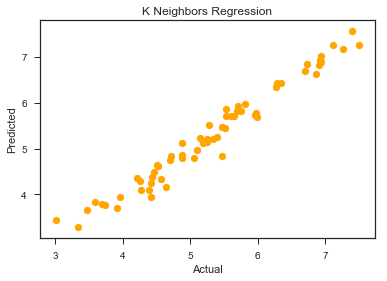

In [37]:
pred = neighbors.predict(x_test)
plt.scatter(y_test, pred, color='orange')
plt.title("K Neighbors Regression")
plt.xlabel("Actual")
plt.ylabel("Predicted")

In [38]:
print(neighbors.score(x_test, y_test))

0.9671892231624861


Text(0,0.5,'Testing accuracy')

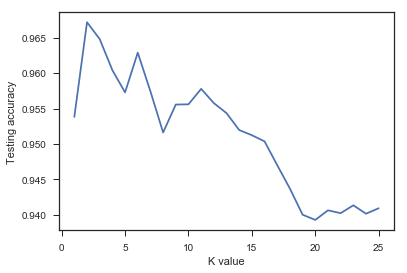

In [39]:
k_range = list(range(1,26))
scores = []

for k in k_range:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(x_train, y_train)
    scores.append(knn.score(x_test, y_test))
    
plt.plot(k_range, scores)
plt.xlabel('K value')
plt.ylabel('Testing accuracy')

In [40]:
df_knn = pd.DataFrame({'Actual': y_test, 'Predicted': pred})  
print(df_knn.head(20))

     Actual  Predicted
64    5.658     5.7085
70    5.528     5.7035
147   3.695     3.7890
64    5.709     5.8530
10    7.267     7.1585
24    6.701     6.6775
124   4.419     4.2545
98    4.876     5.1285
45    5.987     5.6750
5     7.406     7.5570
73    5.399     5.2550
67    5.605     5.7085
20    6.867     6.6190
38    6.295     6.4335
17    6.929     6.9235
154   3.340     3.2890
18    6.907     6.8130
48    5.960     5.7190
115   4.459     4.4870
99    4.874     4.7940


Best k value is 6

### Linear Regression:

In [41]:
from sklearn.linear_model import *

reg = LinearRegression()
reg = reg.fit(x_train, y_train)

print("Slope: ", reg.coef_)
print("Intercept: ", reg.intercept_)

Slope:  [0.99999342 0.99997255 1.00029375 0.99994885 1.00000877 0.99965558
 1.00000447]
Intercept:  1.9329378541321773e-05


In [42]:
print(reg.predict([[0.5,0.5,0.5,0.5,0.5,0.5,0.5]]))

[3.49995803]


In [43]:
print(reg.predict([[1,1,1,1,1,1,1]]))

[6.99989672]


Text(0,0.5,'Predicted')

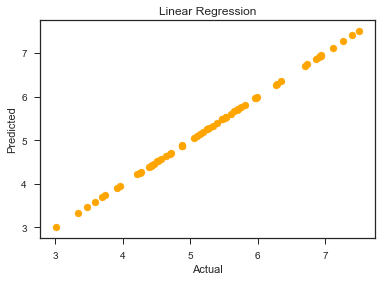

In [44]:
#Make predictions on the testing set
pred = reg.predict(x_test)

plt.scatter(y_test, pred, color='orange')
plt.title("Linear Regression")
plt.xlabel("Actual")
plt.ylabel("Predicted")

In [45]:
#Linear regression more accurate
print(reg.score(x_test, y_test))

0.9999999252362323


In [46]:
print(y_test.size)

63


In [47]:
print(pred.size)

63


In [48]:
df_lin = pd.DataFrame({'Actual': y_test, 'Predicted': pred})  
print(df_lin.head(20))

     Actual  Predicted
64    5.658   5.657663
70    5.528   5.528409
147   3.695   3.694868
64    5.709   5.708921
10    7.267   7.267008
24    6.701   6.701439
124   4.419   4.419399
98    4.876   4.876110
45    5.987   5.987039
5     7.406   7.405973
73    5.399   5.398851
67    5.605   5.604539
20    6.867   6.867256
38    6.295   6.294708
17    6.929   6.929390
154   3.340   3.340116
18    6.907   6.906655
48    5.960   5.959580
115   4.459   4.458618
99    4.874   4.874332
